### 1. Import Packages

In [1]:
# To perform mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np
# For data manipulation and analysis
import pandas as pd
import matplotlib.pyplot as plt
# To perform data and time operations
import datetime as dt
# To scale the data
from sklearn.preprocessing import StandardScaler
# To calculate eigen values and eigen vectors
from numpy.linalg import eig
# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

### 2. Read the data

In [2]:
# Read the data
raw_data = pd.read_csv(r"C:\Users\vargh\OneDrive\Desktop\Assignment and Projects\Principal Component Analysis (PCA)\Dataset\houseprice.csv")
# print the first five rows of the data
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 3. Understand and Prepare the data

###### Change index column

The first column in the data contains a unique numbering for each observation. We can make the column as an index column.

In [3]:
raw_data = pd.read_csv(r"C:\Users\vargh\OneDrive\Desktop\Assignment and Projects\Principal Component Analysis (PCA)\Dataset\houseprice.csv", index_col=0)
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### 3.1 Datatypes and Dimensions

In [4]:
# Check the datatypes of the variables
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
# get the shape
raw_data.shape

(1460, 80)

In [6]:
# Use .astype() ro change the datatype
# Use 'for' loop to change the data type of a large number of columns
for feature in ['MSSubClass','OverallQual','OverallCond']:
    raw_data[feature] = raw_data[feature].astype('object')

In [7]:
# Rechecking the datatype of the variables
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

#### 3.2 Feature Engineering

In [8]:
# 'now().year' gives the current year
# Store the year as 'current_year'
current_year = int(dt.datetime.now().year)

In [9]:
# Creating 2 new columns as 'Building_age' and 'Remodel_age'
Building_age = current_year - raw_data.YearBuilt
Remodel_age = current_year - raw_data.YearRemodAdd

# Add the above columns in our dataframe
raw_data['Building_age']=Building_age
raw_data['Remodel_age']=Remodel_age

In [10]:
# Printing the head of the data to check whether the new columns are added or not
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Building_age,Remodel_age
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,2,2008,WD,Normal,208500,18,18
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,0,5,2007,WD,Normal,181500,45,45
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2008,WD,Normal,223500,20,19
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,106,51
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,0,12,2008,WD,Normal,250000,21,21


In [11]:
raw_data.shape

(1460, 82)

#### 3.3 Missing Data Treatment

In [12]:
# Sorting variables on the basis of null values
#'ascending = False' sorts values in the descending order
Total = raw_data.isnull().sum().sort_values(ascending=False)

# Percentage of the missing values
Percent = (raw_data.isnull().sum()*100/raw_data.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([Total,Percent],axis=1, keys=['Total','Percent'])
missing_data

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
...,...,...
HalfBath,0,0.000000
BedroomAbvGr,0,0.000000
KitchenAbvGr,0,0.000000
KitchenQual,0,0.000000


In [13]:
raw_data['Alley'].fillna('No alley access', inplace=True)

In [14]:
raw_data['MasVnrType'].fillna('None', inplace=True)

In [15]:
for col in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    raw_data[col].fillna('No basement', inplace=True)

In [16]:
raw_data['Electrical'].fillna('Sbrkr', inplace=True)

In [18]:
raw_data['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [19]:
for col in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    raw_data[col].fillna('No Garage', inplace=True)

In [20]:
raw_data['PoolQC'].fillna('No Pool', inplace=True)

In [21]:
raw_data['Fence'].fillna('No Fence', inplace=True)

In [22]:
raw_data['MiscFeature'].fillna('None', inplace=True)

In [23]:
raw_data['LotFrontage'].fillna(raw_data['LotFrontage'].median(), inplace=True)

In [24]:
raw_data['MasVnrArea'].fillna(0, inplace=True)

In [25]:
raw_data['GarageYrBlt'].fillna(0, inplace=True)

In [26]:
raw_data.isnull().any().sum()

0

#### 4. Compute Principal Components

4.1 Prepare the data

In [27]:
df_numeric_features = raw_data.select_dtypes(include=[np.number])
df_num = df_numeric_features.drop('SalePrice', axis=1)
df_num.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Building_age,Remodel_age
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,61,0,0,0,0,0,2,2008,18,18
2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,0,0,5,2007,45,45
3,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,42,0,0,0,0,0,9,2008,20,19
4,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,35,272,0,0,0,0,2,2006,106,51
5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,84,0,0,0,0,0,12,2008,21,21


4.2 Scale the data

In [28]:
df_num_std = StandardScaler().fit_transform(df_num)
df_num_std

array([[-0.22087509, -0.20714171,  1.05099379, ...,  0.13877749,
        -1.05099379, -0.87866809],
       [ 0.46031974, -0.09188637,  0.15673371, ..., -0.61443862,
        -0.15673371,  0.42957697],
       [-0.08463612,  0.07347998,  0.9847523 , ...,  0.13877749,
        -0.9847523 , -0.83021457],
       ...,
       [-0.1754621 , -0.14781027, -1.00249232, ...,  1.64520971,
         1.00249232, -1.02402865],
       [-0.08463612, -0.08016039, -0.70440562, ...,  1.64520971,
         0.70440562, -0.53949344],
       [ 0.23325479, -0.05811155, -0.20759447, ...,  0.13877749,
         0.20759447,  0.96256569]])

In [31]:
df_num_std.shape

(1460, 35)

4.3 Covariance matrix

In [32]:
cov_mat = np.cov(df_num_std.T)
cov_mat[0:5]

array([[ 1.00068540e+00,  3.04730891e-01,  1.16765369e-01,
         8.34052140e-02,  1.78590896e-01,  2.14513541e-01,
         4.24923323e-02,  1.24183267e-01,  3.63721436e-01,
         4.14056133e-01,  7.24376356e-02,  3.74949923e-02,
         3.68259672e-01,  9.04047865e-02, -6.98377770e-03,
         1.80657531e-01,  4.72540062e-02,  2.37002365e-01,
        -4.90803219e-03,  3.20737339e-01,  2.33380490e-01,
         9.92638352e-02,  2.69723997e-01,  3.23732664e-01,
         7.55938857e-02,  1.37107470e-01,  1.02942634e-02,
         6.19876851e-02,  3.76808863e-02,  1.80942511e-01,
        -2.55539426e-04,  1.04578463e-02,  6.38480650e-03,
        -1.16765369e-01, -8.34052140e-02],
       [ 3.04730891e-01,  1.00068540e+00,  1.42374034e-02,
         1.37978777e-02,  1.03391322e-01,  2.14249877e-01,
         1.11245941e-01, -2.62015458e-03,  2.61011910e-01,
         2.99679839e-01,  5.10208941e-02,  4.78224538e-03,
         2.63296507e-01,  1.58262930e-01,  4.80785014e-02,
         1.26

4.4 Compute Eigen values and Eigen Vectors

In [33]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigen values:','\n','\n', eig_val,'\n')
print('Eigen vectors:','\n','\n', eig_vec,'\n')

Eigen values: 
 
 [ 7.02177050e+00  3.31255010e+00  2.62014342e+00  1.89709198e+00
  1.49734667e+00  9.99263899e-02  1.36214989e-01  1.95108720e-01
  2.13950778e-01  3.01103966e-01  3.54408421e-01  4.01613912e-01
  1.27323863e+00  5.45571325e-01  5.57495391e-01  6.14455332e-01
  6.53106933e-01  6.65210391e-01  1.17628474e+00  7.70438353e-01
  7.98982584e-01  8.42159693e-01  8.54295919e-01  1.12605403e+00
  1.11386919e+00  9.17108768e-01  1.06812304e+00  1.04387620e+00
  9.58644771e-01  1.01349985e+00  9.80344037e-01 -9.78695971e-16
  6.24552222e-16  2.60758478e-16  5.63614466e-17] 

Eigen vectors: 
 
 [[-1.57341483e-01 -8.14685975e-02  2.25870623e-01 ... -2.87653876e-16
  -3.15602014e-17  1.50562030e-16]
 [-1.05975763e-01 -4.68261206e-02  2.65177563e-01 ... -1.32973264e-16
   3.26380846e-16 -1.76771101e-16]
 [-2.55985052e-01  2.51938290e-01 -2.26447644e-01 ... -7.28623408e-02
  -7.02595429e-01  2.54879128e-01]
 ...
 [ 1.05407256e-02  3.81464928e-02  5.52812401e-03 ...  4.47380117e-17
 

4.5 Decide number of Principal Components

In [35]:
eig_val = list(eig_val)
eig_val.sort(reverse=True)
print(eig_val)

[7.021770499413526, 3.3125501041720877, 2.6201434201098315, 1.8970919779158217, 1.4973466747555333, 1.2732386321497011, 1.176284735325434, 1.1260540287787304, 1.1138691902660693, 1.0681230423123216, 1.0438762011995286, 1.0134998547738203, 0.980344036982689, 0.9586447711070979, 0.9171087678623876, 0.8542959189393421, 0.8421596927472562, 0.7989825842753169, 0.7704383525332144, 0.665210391069333, 0.653106932825129, 0.6144553317267796, 0.5574953911006534, 0.5455713249726747, 0.4016139120737054, 0.3544084205249444, 0.3011039663361463, 0.21395077836552653, 0.1951087197992301, 0.13621498924662376, 0.09992638992418577, 6.245522219626223e-16, 2.6075847833175837e-16, 5.636144663966596e-17, -9.786959709691987e-16]


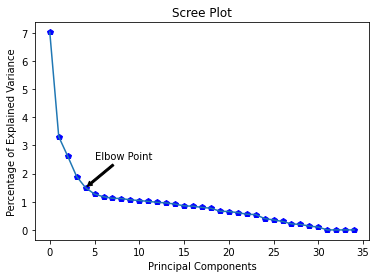

In [37]:
plt.plot(eig_val,'bp')
plt.plot(eig_val)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained Variance')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(text='Elbow Point', xy=(4,1.5), xytext=(5,2.5),
            arrowprops=dict(facecolor='black',arrowstyle='simple'))
plt.title('Scree Plot')
plt.show()

4.6 Calculate the principal components

In [38]:
eigenvector = eig_vec[:,0:5]
eigenvector

array([[-0.15734148, -0.0814686 ,  0.22587062,  0.10722212, -0.00752845],
       [-0.10597576, -0.04682612,  0.26517756, -0.01500761, -0.00786312],
       [-0.25598505,  0.25193829, -0.22644764, -0.03246855,  0.04820808],
       [-0.23277906,  0.15445072, -0.2753199 , -0.01428159,  0.26832427],
       [-0.1912835 , -0.00691731,  0.04663417, -0.02642127, -0.07848375],
       [-0.14599174,  0.21408979,  0.34881371, -0.2640932 ,  0.14572962],
       [ 0.00973451,  0.03635902,  0.17643327, -0.08698812, -0.03447938],
       [-0.10716365, -0.12447427, -0.17122358,  0.56562785, -0.04965918],
       [-0.25613609,  0.11057602,  0.25506258,  0.26315384,  0.08881146],
       [-0.25253012,  0.03831097,  0.30414927,  0.28994057,  0.09159884],
       [-0.12387082, -0.38214632, -0.18281738, -0.33480834, -0.02535135],
       [ 0.02405102, -0.14573334,  0.06296919,  0.03670041,  0.18515617],
       [-0.28645931, -0.30275762,  0.07771394, -0.06143218,  0.06346053],
       [-0.08222127,  0.23681672,  0.2

In [41]:
# take the dot product of 'df_num_std' with 'eigenvector' to obtain new dataset
# create a dataframe of principal components
df_pca = pd.DataFrame(df_num_std.dot(eigenvector),columns=['PC1','PC2','PC3','PC4','PC5'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.571468,0.233699,-1.586585,-2.219473,0.715615
1,-0.199890,0.835867,1.050234,0.097077,-0.627275
2,-1.740971,0.251788,-1.391157,-1.637273,0.046151
3,1.470652,-1.877190,1.515307,-0.180157,-1.837106
4,-4.216754,-1.116376,-0.533713,-1.621483,-0.334647


In [42]:
df_pca.shape

(1460, 5)

#### 5. PCA using sklearn

In [43]:
pca = PCA(n_components=5, random_state=0)
PrincipalComponents = pca.fit_transform(df_num_std)

In [44]:
PCA_df = pd.DataFrame(data=PrincipalComponents,columns=['PC1','PC2','PC3','PC4','PC5'])
PCA_df.head()

,PC1,PC2,PC3,PC4,PC5
0,1.571352,-0.240622,-1.586777,-2.241474,0.753565
1,0.199709,-0.835527,1.042285,0.089567,-0.634687
2,1.741028,-0.250540,-1.389540,-1.627933,0.038217
3,-1.470503,1.871470,1.526313,-0.195221,-1.759654
4,4.216874,1.125024,-0.532845,-1.588267,-0.391245
